# Importing Libraries and Defining Funcations

In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

def get_manhattan_distance(p1, p2):
    manhattan_dist = 0
    for i in range(len(p1)):
        manhattan_dist += abs(int(p1[i]) - int(p2[i]))
    return manhattan_dist

def get_euclidean_distance(p1, p2):
    euclidean_dist = 0
    for i in range(len(p1)):
        euclidean_dist += (int(p1[i]) - int(p2[i]))**2
    return np.sqrt(euclidean_dist)

# Reading Train and Test Data

In [2]:
# Using local machine
train_path = r'/Users/macbook/CIFAR-10-images/train'
test_path = r'/Users/macbook/CIFAR-10-images/test'

X_train = []
y_train = []
X_test = []
y_test = []

categories = os.listdir(train_path)
categories.remove('.DS_Store')
print('Categories:',categories)


# Using google colab
'''
from google.colab import drive
drive.mount('/content/drive/')

train_path = r'/content/drive/MyDrive/Colab Notebooks/CIFAR-10-images/train'
test_path = r'/content/drive/MyDrive/Colab Notebooks/CIFAR-10-images/test'

X_train = []
y_train = []
X_test = []
y_test = []

categories = os.listdir(train_path)
print(categories)
'''

category_count = 0
for category in categories:
    category_count += 1
    print('Reading category:',category_count)
    train_category_path = os.path.join(train_path,category)
    test_category_path = os.path.join(test_path,category)
    train_images = os.listdir(train_category_path)
    test_images = os.listdir(test_category_path)
    #print(images)
    
    # Reading Train Data
    for image in train_images:
        #print(os.path.join(category_path,image))
        X_train.append(cv2.imread(os.path.join(train_category_path,image)))
        y_train.append(category)
        
    # Reading Test Data
    for image in test_images:
        #print(os.path.join(category_path,image))
        X_test.append(cv2.imread(os.path.join(test_category_path,image)))
        y_test.append(category)
        
print('Done')

Categories: ['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']
Reading category: 1
Reading category: 2
Reading category: 3
Reading category: 4
Reading category: 5
Reading category: 6
Reading category: 7
Reading category: 8
Reading category: 9
Reading category: 10
Done


# Checking Train Data

50000
50000
<class 'numpy.ndarray'>
(32, 32, 3)
[[[143 149 144]
  [222 226 221]
  [247 250 248]
  ...
  [248 255 250]
  [248 255 254]
  [237 248 245]]

 [[161 165 160]
  [199 203 198]
  [244 247 245]
  ...
  [253 255 252]
  [251 255 254]
  [250 255 254]]

 [[172 176 171]
  [170 174 169]
  [232 235 233]
  ...
  [253 250 245]
  [248 247 243]
  [249 250 246]]

 ...

 [[194 211 224]
  [189 208 221]
  [189 208 221]
  ...
  [ 75  81  80]
  [133 141 141]
  [213 223 223]]

 [[191 208 221]
  [189 206 219]
  [188 207 220]
  ...
  [188 196 196]
  [203 215 215]
  [200 214 213]]

 [[194 210 226]
  [192 208 224]
  [192 211 226]
  ...
  [188 196 196]
  [208 220 220]
  [202 218 217]]]
truck


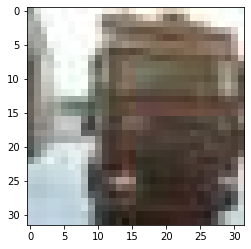

In [3]:
print(len(X_train))
print(len(y_train))
print(type(X_train[10000]))
print(X_train[10000].shape)
print(X_train[10000])
print(y_train[10000])
plt.figure()
plt.imshow(X_train[10000])

# Checking Test Data

10000
10000
<class 'numpy.ndarray'>
(32, 32, 3)
[[[218 213 214]
  [ 92  87  88]
  [ 20  16  15]
  ...
  [247 240 243]
  [251 242 245]
  [251 243 244]]

 [[224 222 222]
  [159 154 155]
  [127 123 122]
  ...
  [241 234 237]
  [245 237 238]
  [244 236 237]]

 [[239 237 237]
  [232 227 228]
  [235 231 230]
  ...
  [241 236 238]
  [242 236 237]
  [241 233 234]]

 ...

 [[213 216 220]
  [209 212 216]
  [196 199 203]
  ...
  [143 148 151]
  [144 149 150]
  [201 206 207]]

 [[208 211 215]
  [150 153 157]
  [ 99 102 106]
  ...
  [ 46  53  56]
  [ 64  69  70]
  [134 139 140]]

 [[189 192 196]
  [ 96  99 103]
  [ 37  40  44]
  ...
  [109 116 119]
  [136 141 142]
  [185 190 191]]]
cat
<class 'list'>


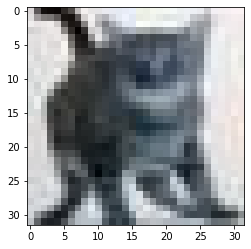

In [4]:
print(len(X_test))
print(len(y_test))
print(type(X_test[100]))
print(X_test[100].shape)
print(X_test[100])
print(y_test[100])
plt.figure()
plt.imshow(X_test[100])
print(type(y_test))

# Calculating Manhattan Distances

In [5]:
distances = []
completed = 0

print('Calculating distance...')

for test_image in X_test:
    manhattan_dist = []
    for train_image in X_train:
        #print(train_image.flatten())
        #manhattan_dist.append(get_manhattan_distance(test_image.flatten(), train_image.flatten()))
        manhattan_dist.append(np.sum(abs(test_image.flatten()-train_image.flatten())))
    distances.append(manhattan_dist)
    completed += 1
    if completed%1000 == 0:
        print(f'Completed: {int(completed/100)}%')
        
print('Done')

Calculating distance...
Completed: 10%
Completed: 20%
Completed: 30%
Completed: 40%
Completed: 50%
Completed: 60%
Completed: 70%
Completed: 80%
Completed: 90%
Completed: 100%
Done


# Checking Distances

In [6]:
print(len(distances))
print(len(distances[1]))
print(min(distances[1]))

10000
50000
288275


# Predicting a Image using KNN (K=1)

In [7]:
min_value_index = np.argmin(distances[1])
print(min_value_index)
print(distances[1][min_value_index])
print('Predicted:',y_train[min_value_index])
print('Actual:',y_test[1])

3039
288275
Predicted: cat
Actual: cat


# Calculating Accuracy in Percentage of KNN (K=1)

In [8]:
correct = 0
wrong = 0

for i,distance in enumerate(distances):
    min_value_index = np.argmin(distance)
    #print(y_test[i])
    if y_test[i] == y_train[min_value_index]:
        correct += 1
    else:
        wrong += 1
        
print('Correct:',correct)
print('Wrong',wrong)
accuracy = (correct/len(distances))*100
print(f'Accuracy: {accuracy}%')

Correct: 2690
Wrong 7310
Accuracy: 26.900000000000002%


# Calculating Accuracies in Percentage of KNN (K=1-20)

In [9]:
accuracies = []
k_values = range(1,21)

for k in k_values:  
    correct = 0
    wrong = 0
    for i,distance in enumerate(distances):
        #min_value_index = np.argmin(distance)
        sorted_dist = np.argsort(distance)
        #print(sorted_dist[:5])
        predictions = []
        for dist in sorted_dist[:k]:
            #print(distance[dist],end=' ')
            #print(y_train[dist])
            predictions.append(y_train[dist])
        #print(y_test[i])
        predicted = max(predictions, key=predictions.count)
        #print('predictions:',predictions)
        #print('Predicted:',predicted)
        if predicted == y_test[i]:
            correct += 1
        else:
            wrong += 1
        #print(y_test[i])
        #print('...')

    #print('For k:',k)
    #print('Correct:',correct)
    #print('Wrong',wrong)
    accuracy = (correct/len(distances))*100
    accuracies.append(accuracy)
    #print(f'Accuracy: {accuracy}%')
    #print('~~~~~~~~~~~~~~~~~~~~')

# Ploting Graph of Accuracies in Percentage for K=1-20

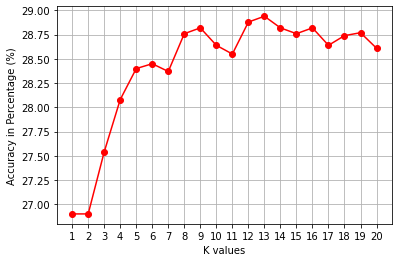

In [10]:
plt.figure()
plt.plot(k_values,accuracies,'ro-')
plt.xlabel('K values')
plt.ylabel('Accuracy in Percentage (%)')
plt.xticks(k_values)
plt.grid(True)
plt.show()